# **Keras using a TensorFlow 2.0 Backend**
### **Training a Simple CNN on the MNIST Dataset - Handwrittent Digits**

---



---



Using **Keras with a TensorFlow 2.0** Backend to to create a **simple Convolutional Neural Network model** in Python and train it to **recognize handwritten digits in the MNIST dataset.**
1. Loading our MNIST dataset
2. Inspecting our dataset 
3. Visualizing our image dataset
5. Preprocessing our dataset
6. Building our Model
7. Training our Model
8. Plotting our training logs
9. Saving and Loading our Model
10. Testing our model on test data

# **1. Loading our Data**

In [ ]:
# We can load the built in datasets from this function
from tensorflow.keras.datasets import mnist

# loads the MNIST training and test dataset 
(x_train, y_train), (x_test, y_test)  = mnist.load_data()


# Check to see if we're using the GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1330197690904102497
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16755446882676291246
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


## **2. Inspecting our dataset**

In [ ]:
print("MNIST dataset:")
print("This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.")

print("\n")
print("x_train: uint8 NumPy array of grayscale image data containing the training data with shape "  + str(x_train.shape) + 
      " and Pixel values range from 0 to 255.")
print("y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape " + str(y_train.shape) +" for the training data. ")
print("\n")

print("x_test: uint8 NumPy array of grayscale image data containing the test data with shape " + str(x_test.shape) +
      "and Pixel values range from 0 to 255.")
print("y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape "+ str(y_test.shape) +" for the test data.")
print("\n")

print("Number of images and labels in training data: " + str(len(x_train)))
print("Number of images and labels in testing data: " + str(len(x_test)))
print("\n")
print("Images dimensions: " +  str(x_train[0].shape))

MNIST dataset:
This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.


x_train: uint8 NumPy array of grayscale image data containing the training data with shape (60000, 28, 28) and Pixel values range from 0 to 255.
y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000, 28, 28) for the training data. 


x_test: uint8 NumPy array of grayscale image data containing the test data with shape (60000, 28, 28)and Pixel values range from 0 to 255.
y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000, 28, 28) for the test data.


Number of images and labels in training data: 60000
Number of images and labels in testing data: 10000


Images dimensions: (28, 28)


## **3. Visualizing our image dataset**

   **Using OpenCV**

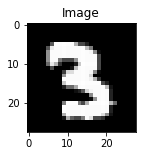

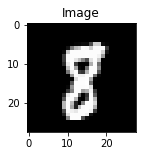

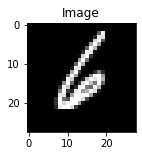

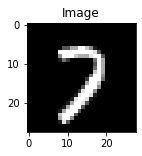

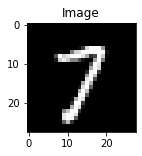

In [ ]:
# import opencv and numpy
import cv2 
import numpy as np
from matplotlib import pyplot as plt

def showImg(title, image, size):

    if not image.any():
      print("Image not found")
    else:
      width, height = image.shape[0], image.shape[1]
      aspect_ratio = width/height
      plt.figure(figsize=(size * aspect_ratio, size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()


# Use OpenCV to display 5 random images from our dataset
for i in range(0, 5):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    showImg("Image", img, size = 2)

**Usim Matplotlib**

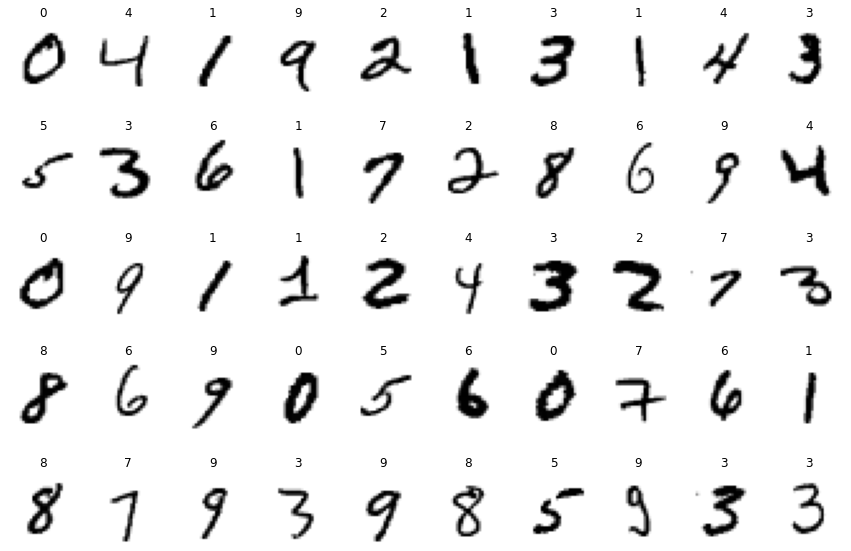

In [ ]:
# Import matplotlib as plt
import matplotlib.pyplot as plt

# Represent the number of images to show
num_of_images = 50 

# Create figure and change size
plt.figure(figsize=(15,10))

# iterate index from 1 to 51 to show the first 50 images from training dataset
for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

# **4. Preprocessing our dataset**

Befor passing our data to CNN for training, we need to prepare it firstly.

1. Reshaping our data by adding 4th dimension
2. Changing our datatype fron unit8 to float32
3. Normalizing our data to values between 0 to 1
4. One hot encoding

In [ ]:
# Store the number of images rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Store the shape of single image
input_shape = (img_rows, img_cols, 1)

# Getting our data in the right 'shape' needed for Keras
# We need to add the 4th dimension to our data thereby changing our
# Original image shape of (60000, 28, 28) to (60000, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Change our image type from unit8 to float32 data type
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

print("x_train.shape:" , x_train.shape)
print("image shape:" , x_train[1].shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train.shape: (60000, 28, 28, 1)
image shape: (28, 28, 1)
60000 train samples
10000 test samples


### **One Hot Encode our Labels (Y)**

In [ ]:
# Import the one hot encode function
from tensorflow.keras.utils import to_categorical

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Store number of classes
num_classes = y_test.shape[1]

# Count the columns number of our hot encoding matrix
print("Number of Classes: " , num_classes)

Number of Classes:  10


#### **Example of One Hot Encoding**
![Image of one hot ncoding](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/hotoneencode.JPG)

## **5. Building Our Model**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%204.21.04%402x.png)


In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD 

# Create Model
model = Sequential()

# Our First Convolution Layer, Filter size 32 which reduces our layer size to 26 x 26 x 32
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Our Second Convolution Layer, Filter size 64 which reduces our layer to 24 x 24 x 64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# We Flatten our tensor object from (12 X 12 X 64) to (9216 X 1)
model.add(Flatten())

# Connect this layer to a Fully Connected/Dense Layer of size 128 * 1
model.add(Dense(128, activation='relu'))

# Create our final Fully Connected/Dense Layer with an output for each class (10) 
model.add(Dense(num_classes, activation='softmax'))

# Compile our model, this creates an object that stores the model we just created
# Set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.001)
# Set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Set our metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001), metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

## **6. Training our Model**

In [ ]:
epochs = 15
batch_size = 128

# Store our results here so we can plot later
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## **7. Ploting our Loss and Accuracy Charts**

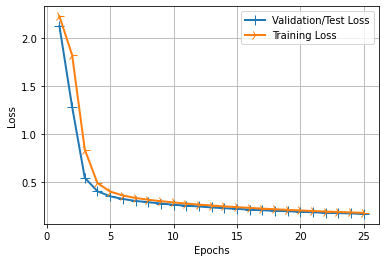

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### **Our Accuracy Charts**

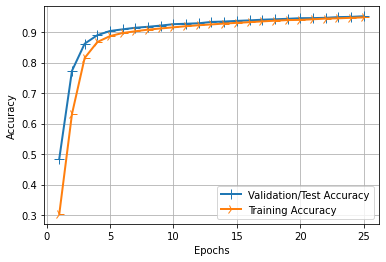

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

# Extract the accuracy and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## **8. Saving and Loadng our Model**

In [ ]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


**Loading our Saved Model is also simple, just use:**

In [ ]:
# Import our load_model function 
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

##  **9. Getting Predictions from our sample Test Data**

**Predicting all test data**

In [ ]:
print(x_test.shape)
print("Predicting classes for all 10,000 test images...")
pred = np.argmax(classifier.predict(x_test), axis=-1)
print("Completed.\n")

print(pred)
print(type(pred))
print(len(pred))

(10000, 28, 28, 1)
Predicting classes for all 10,000 test images...
313/313 [==============================] - 1s 2ms/step
Completed.

[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
10000


### **Put the predicted label on an image with the test data image**

1/1 [==============================] - 0s 63ms/step


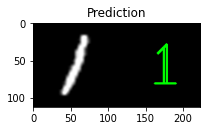

1/1 [==============================] - 0s 16ms/step


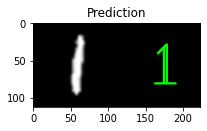

1/1 [==============================] - 0s 15ms/step


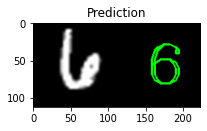

1/1 [==============================] - 0s 15ms/step


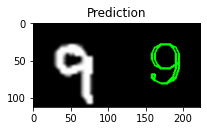

1/1 [==============================] - 0s 15ms/step


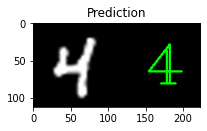

1/1 [==============================] - 0s 21ms/step


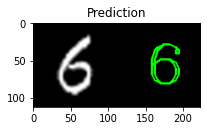

1/1 [==============================] - 0s 18ms/step


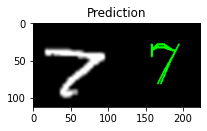

1/1 [==============================] - 0s 20ms/step


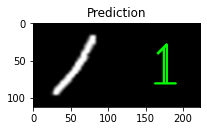

1/1 [==============================] - 0s 17ms/step


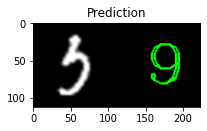

1/1 [==============================] - 0s 19ms/step


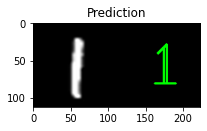

In [ ]:
import cv2
import numpy as np

# Reload our data since we rescaled it
(x_train, y_train), (x_test, y_test)  = mnist.load_data()


def draw_test(name, pred, input_im):
  
    '''Function that places the predicted class next to the original image'''
    # Create black background
    BLACK = [0,0,0]
    # Expended our original image to the right to create space to place our predicted class text
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    # convert our grayscale image to color
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    # Put our predicted class text in our expanded image
    cv2.putText(expanded_image, str(pred), (150, 80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    showImg(name, expanded_image, 6)


for i in range(0,10):
    # Get a random data image from our test dataset 
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    # Create a larger re-sized image to hold our text and allow for a larger display
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    # Reshape our data so that we can input it (forward propagate) it to our network
    input_im = input_im.reshape(1,28,28,1) 
    
    # Get Prediction, use [0] to access the value in the numpy array since it's stored as an array
    res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])

    # Put the label on the image of our test data sample
    draw_test("Prediction", res,  np.uint8(imageL)) 
